In [4]:
import pandas as pd
import sqlite3
import os

# Check available files
print("Available files:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load CSV 
deaths = pd.read_csv('/kaggle/input/covid-19-data-analysis-with-sql/CovidDeaths.csv')
vaccinations = pd.read_csv('/kaggle/input/covid-19-data-analysis-with-sql/CovidVaccination.csv')  # Tanpa 's'

print(f"\nDeaths data shape: {deaths.shape}")
print(f"Vaccinations data shape: {vaccinations.shape}")

# Preview data
print("\nFirst 5 rows of Deaths data:")
print(deaths.head())

print("\nFirst 5 rows of Vaccinations data:")
print(vaccinations.head())

# Check columns
print("\nDeaths columns:")
print(deaths.columns.tolist())

print("\nVaccinations columns:")
print(vaccinations.columns.tolist())


Available files:
/kaggle/input/covid-19-data-analysis-with-sql/CovidVaccination.csv
/kaggle/input/covid-19-data-analysis-with-sql/CovidDeaths.csv

Deaths data shape: (380574, 26)
Vaccinations data shape: (262423, 45)

First 5 rows of Deaths data:
  iso_code continent     location        date  population  total_cases  \
0      AFG      Asia  Afghanistan  2020-01-05  41128772.0          NaN   
1      AFG      Asia  Afghanistan  2020-01-06  41128772.0          NaN   
2      AFG      Asia  Afghanistan  2020-01-07  41128772.0          NaN   
3      AFG      Asia  Afghanistan  2020-01-08  41128772.0          NaN   
4      AFG      Asia  Afghanistan  2020-01-09  41128772.0          NaN   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0        0.0                 NaN           NaN         0.0  ...   
1        0.0                 NaN           NaN         0.0  ...   
2        0.0                 NaN           NaN         0.0  ...   
3        0.0                 NaN        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [5]:
import pandas as pd
import sqlite3

# Buat SQLite database in-memory
conn = sqlite3.connect(':memory:')

# Load data ke SQL tables
deaths.to_sql('covid_deaths', conn, index=False, if_exists='replace')
vaccinations.to_sql('covid_vaccinations', conn, index=False, if_exists='replace')

print("✓ Data berhasil di-load ke SQLite database")
print(f"✓ Table 'covid_deaths': {len(deaths)} rows")
print(f"✓ Table 'covid_vaccinations': {len(vaccinations)} rows")


✓ Data berhasil di-load ke SQLite database
✓ Table 'covid_deaths': 380574 rows
✓ Table 'covid_vaccinations': 262423 rows


In [6]:
# struktur tabel covid_deaths
query1 = """
SELECT * 
FROM covid_deaths
LIMIT 5;
"""

result1 = pd.read_sql(query1, conn)
print("Sample data from covid_deaths:")
print(result1)


Sample data from covid_deaths:
  iso_code continent     location        date  population total_cases  \
0      AFG      Asia  Afghanistan  2020-01-05  41128772.0        None   
1      AFG      Asia  Afghanistan  2020-01-06  41128772.0        None   
2      AFG      Asia  Afghanistan  2020-01-07  41128772.0        None   
3      AFG      Asia  Afghanistan  2020-01-08  41128772.0        None   
4      AFG      Asia  Afghanistan  2020-01-09  41128772.0        None   

   new_cases new_cases_smoothed total_deaths  new_deaths  ...  \
0        0.0               None         None         0.0  ...   
1        0.0               None         None         0.0  ...   
2        0.0               None         None         0.0  ...   
3        0.0               None         None         0.0  ...   
4        0.0               None         None         0.0  ...   

  new_deaths_smoothed_per_million reproduction_rate  icu_patients  \
0                            None              None          None   
1

In [7]:
# Data COVID-19 Indonesia
query2 = """
SELECT 
    location,
    date,
    total_cases,
    new_cases,
    total_deaths,
    population
FROM covid_deaths
WHERE location = 'Indonesia'
ORDER BY date DESC
LIMIT 10;
"""

result2 = pd.read_sql(query2, conn)
print("\nCOVID-19 Data Indonesia (Latest 10 records):")
print(result2)



COVID-19 Data Indonesia (Latest 10 records):
    location        date  total_cases  new_cases  total_deaths   population
0  Indonesia  2024-02-18    6828326.0        0.0      162050.0  275501344.0
1  Indonesia  2024-02-17    6828326.0        0.0      162050.0  275501344.0
2  Indonesia  2024-02-16    6828326.0        0.0      162050.0  275501344.0
3  Indonesia  2024-02-15    6828326.0        0.0      162050.0  275501344.0
4  Indonesia  2024-02-14    6828326.0        0.0      162050.0  275501344.0
5  Indonesia  2024-02-13    6828326.0        0.0      162050.0  275501344.0
6  Indonesia  2024-02-12    6828326.0        0.0      162050.0  275501344.0
7  Indonesia  2024-02-11    6828326.0       58.0      162050.0  275501344.0
8  Indonesia  2024-02-10    6828268.0        0.0      162054.0  275501344.0
9  Indonesia  2024-02-09    6828268.0        0.0      162054.0  275501344.0



Death Percentage in Indonesia:
       location        date  total_cases  total_deaths  death_percentage
1433  Indonesia  2024-02-09    6828268.0      162054.0              2.37
1434  Indonesia  2024-02-10    6828268.0      162054.0              2.37
1435  Indonesia  2024-02-11    6828326.0      162050.0              2.37
1436  Indonesia  2024-02-12    6828326.0      162050.0              2.37
1437  Indonesia  2024-02-13    6828326.0      162050.0              2.37
1438  Indonesia  2024-02-14    6828326.0      162050.0              2.37
1439  Indonesia  2024-02-15    6828326.0      162050.0              2.37
1440  Indonesia  2024-02-16    6828326.0      162050.0              2.37
1441  Indonesia  2024-02-17    6828326.0      162050.0              2.37
1442  Indonesia  2024-02-18    6828326.0      162050.0              2.37


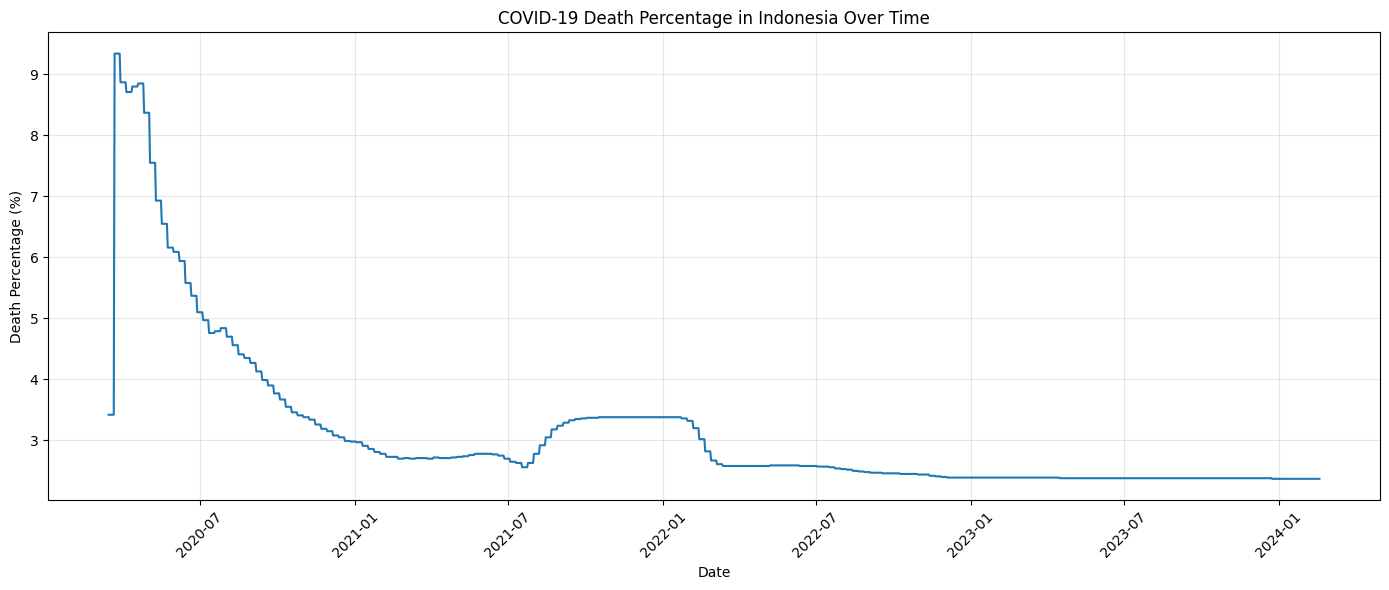

In [8]:
# Death percentage - likelihood of dying if you contract COVID in Indonesia
query3 = """
SELECT 
    location,
    date,
    total_cases,
    total_deaths,
    ROUND((CAST(total_deaths AS FLOAT) / CAST(total_cases AS FLOAT)) * 100, 2) AS death_percentage
FROM covid_deaths
WHERE location = 'Indonesia'
    AND total_cases > 0
ORDER BY date;
"""

death_rate_id = pd.read_sql(query3, conn)
print("\nDeath Percentage in Indonesia:")
print(death_rate_id.tail(10))  # 10 data terakhir

# Visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pd.to_datetime(death_rate_id['date']), death_rate_id['death_percentage'])
plt.title('COVID-19 Death Percentage in Indonesia Over Time')
plt.xlabel('Date')
plt.ylabel('Death Percentage (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Infection rate - what percentage of population got COVID
query4 = """
SELECT 
    location,
    date,
    population,
    total_cases,
    ROUND((CAST(total_cases AS FLOAT) / population) * 100, 4) AS infection_rate
FROM covid_deaths
WHERE location = 'Indonesia'
    AND total_cases > 0
ORDER BY date;
"""

infection_rate_id = pd.read_sql(query4, conn)
print("\nInfection Rate in Indonesia:")
print(infection_rate_id.tail(10))



Infection Rate in Indonesia:
       location        date   population  total_cases  infection_rate
1433  Indonesia  2024-02-09  275501344.0    6828268.0          2.4785
1434  Indonesia  2024-02-10  275501344.0    6828268.0          2.4785
1435  Indonesia  2024-02-11  275501344.0    6828326.0          2.4785
1436  Indonesia  2024-02-12  275501344.0    6828326.0          2.4785
1437  Indonesia  2024-02-13  275501344.0    6828326.0          2.4785
1438  Indonesia  2024-02-14  275501344.0    6828326.0          2.4785
1439  Indonesia  2024-02-15  275501344.0    6828326.0          2.4785
1440  Indonesia  2024-02-16  275501344.0    6828326.0          2.4785
1441  Indonesia  2024-02-17  275501344.0    6828326.0          2.4785
1442  Indonesia  2024-02-18  275501344.0    6828326.0          2.4785



Countries with Highest Infection Rate:
                     location  population  highest_infection_count  \
0                      Brunei    449002.0                 343199.0   
1                      Cyprus    896007.0                 681110.0   
2                  San Marino     33690.0                  25292.0   
3                     Austria   8939617.0                6081287.0   
4                 South Korea  51815808.0               34571873.0   
5              Faeroe Islands     53117.0                  34658.0   
6                    Slovenia   2119843.0                1355700.0   
7                   Gibraltar     32677.0                  20550.0   
8                  Martinique    367512.0                 230354.0   
9                  Luxembourg    647601.0                 391093.0   
10                    Andorra     79843.0                  48015.0   
11                     Jersey    110796.0                  66391.0   
12                    Denmark   5882259.0         

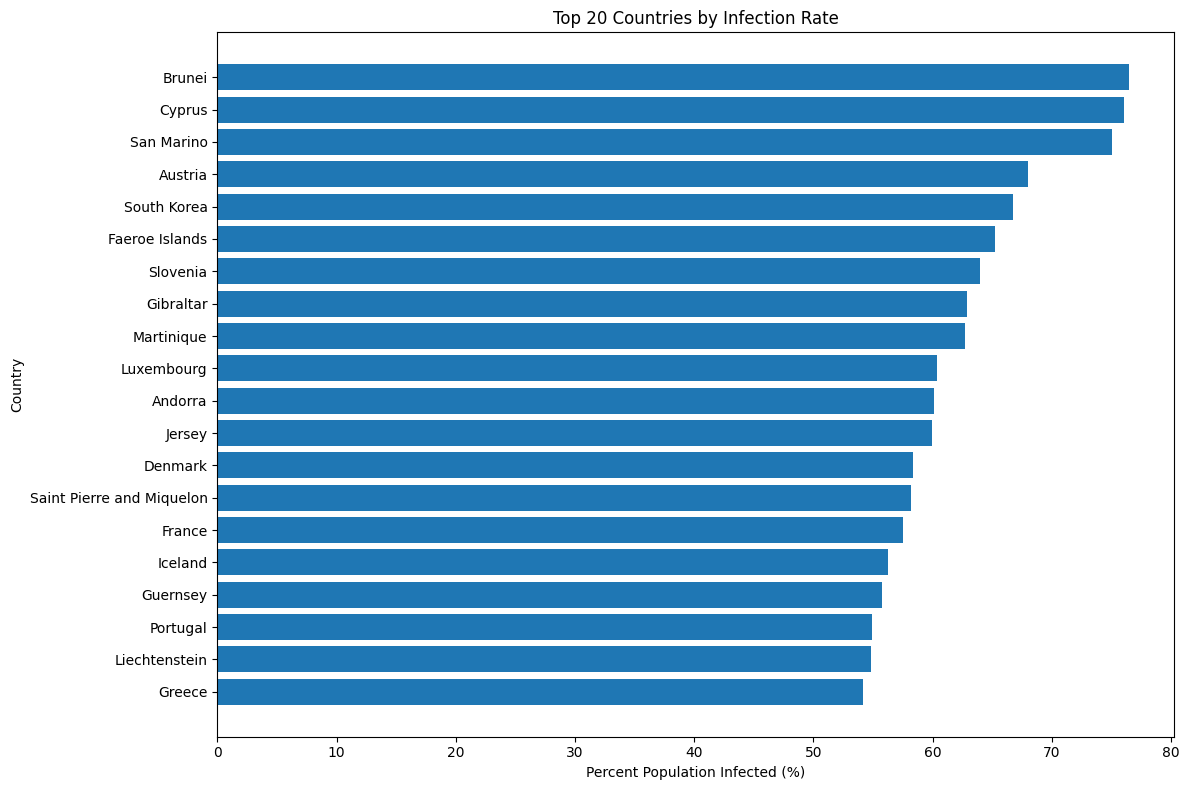

In [10]:
# Countries with highest infection rate compared to population
query5 = """
SELECT 
    location,
    population,
    MAX(total_cases) AS highest_infection_count,
    ROUND(MAX((CAST(total_cases AS FLOAT) / population) * 100), 2) AS percent_population_infected
FROM covid_deaths
WHERE continent IS NOT NULL
    AND population > 0
GROUP BY location, population
ORDER BY percent_population_infected DESC
LIMIT 20;
"""

highest_infection = pd.read_sql(query5, conn)
print("\nCountries with Highest Infection Rate:")
print(highest_infection)

# Visualisasi
plt.figure(figsize=(12, 8))
plt.barh(highest_infection['location'], highest_infection['percent_population_infected'])
plt.xlabel('Percent Population Infected (%)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Infection Rate')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Countries with Highest Death Count:
          location  total_death_count
0    United States            1177223
1           Brazil             702116
2            India             533472
3           Russia             402097
4           Mexico             334958
5   United Kingdom             232112
6             Peru             220716
7            Italy             196592
8          Germany             174979
9           France             167985
10       Indonesia             162054
11            Iran             146811
12        Colombia             142727
13       Argentina             130573
14           China             121976
15           Spain             121852
16          Poland             120665
17         Ukraine             109918
18    South Africa             102595
19          Turkey             101419


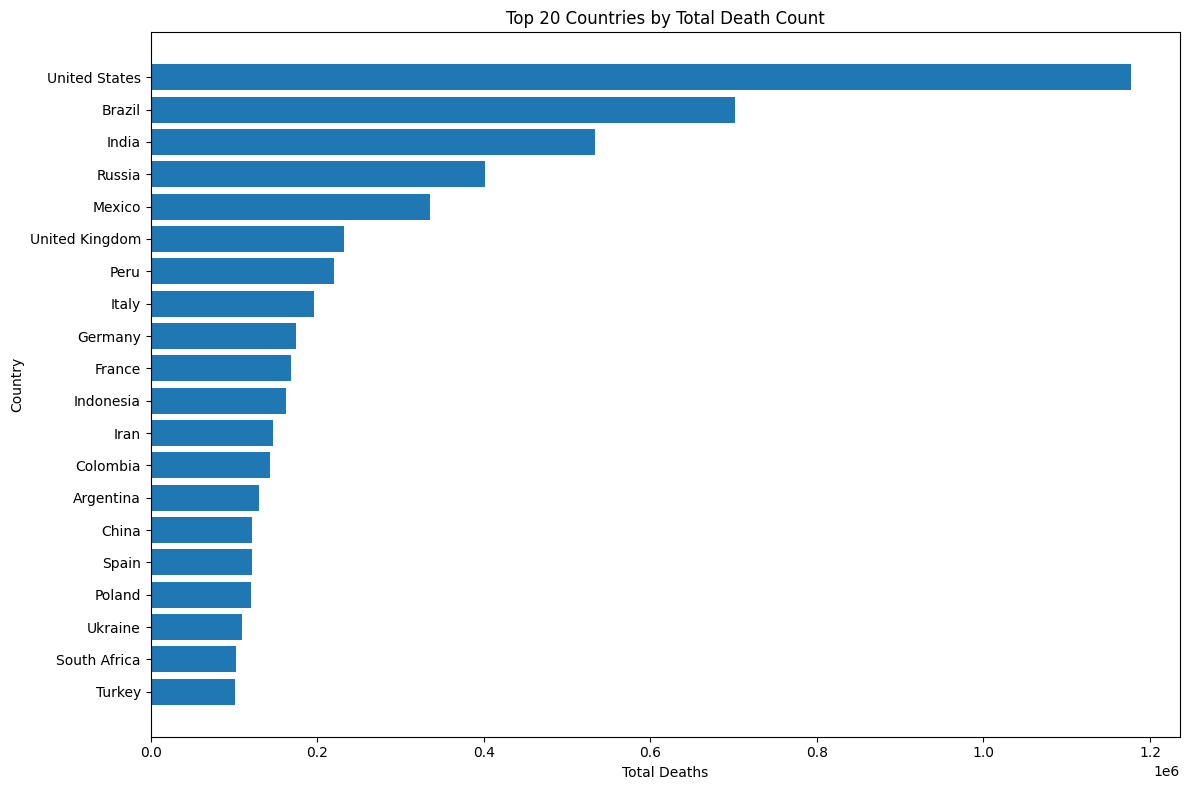

In [11]:
# Countries with highest death count
query6 = """
SELECT 
    location,
    MAX(CAST(total_deaths AS INTEGER)) AS total_death_count
FROM covid_deaths
WHERE continent IS NOT NULL
    AND total_deaths IS NOT NULL
GROUP BY location
ORDER BY total_death_count DESC
LIMIT 20;
"""

highest_deaths = pd.read_sql(query6, conn)
print("\nCountries with Highest Death Count:")
print(highest_deaths)

# Visualisasi
plt.figure(figsize=(12, 8))
plt.barh(highest_deaths['location'], highest_deaths['total_death_count'])
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 20 Countries by Total Death Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Death Count by Continent:
       continent  total_death_count
0  North America            1177223
1  South America             702116
2           Asia             533472
3         Europe             402097
4         Africa             102595
5        Oceania              24782


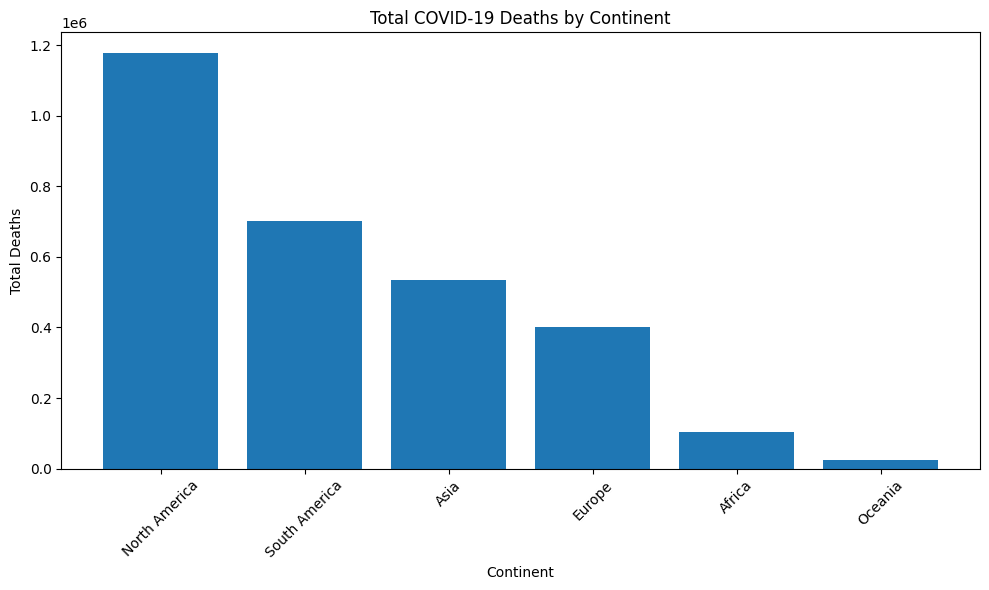

In [12]:
# Breaking down by continent
query7 = """
SELECT 
    continent,
    MAX(CAST(total_deaths AS INTEGER)) AS total_death_count
FROM covid_deaths
WHERE continent IS NOT NULL
    AND total_deaths IS NOT NULL
GROUP BY continent
ORDER BY total_death_count DESC;
"""

continent_deaths = pd.read_sql(query7, conn)
print("\nDeath Count by Continent:")
print(continent_deaths)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(continent_deaths['continent'], continent_deaths['total_death_count'])
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Global numbers - total cases, deaths, death percentage
query8 = """
SELECT 
    SUM(new_cases) AS total_cases,
    SUM(CAST(new_deaths AS INTEGER)) AS total_deaths,
    ROUND((SUM(CAST(new_deaths AS FLOAT)) / SUM(new_cases)) * 100, 2) AS death_percentage
FROM covid_deaths
WHERE continent IS NOT NULL
    AND new_cases > 0;
"""

global_stats = pd.read_sql(query8, conn)
print("\nGlobal COVID-19 Statistics:")
print(global_stats)



Global COVID-19 Statistics:
   total_cases  total_deaths  death_percentage
0  774766789.0       6965213               0.9


In [14]:
# Total population vs vaccinations with rolling count
query9 = """
SELECT 
    d.continent,
    d.location,
    d.date,
    d.population,
    v.new_vaccinations,
    SUM(CAST(v.new_vaccinations AS INTEGER)) OVER (
        PARTITION BY d.location 
        ORDER BY d.date
    ) AS rolling_people_vaccinated
FROM covid_deaths d
JOIN covid_vaccinations v
    ON d.location = v.location
    AND d.date = v.date
WHERE d.continent IS NOT NULL
    AND v.new_vaccinations IS NOT NULL
ORDER BY d.location, d.date;
"""

vaccination_progress = pd.read_sql(query9, conn)
print("\nVaccination Progress (Sample):")
print(vaccination_progress.head(20))



Vaccination Progress (Sample):
   continent     location        date  population  new_vaccinations  \
0       Asia  Afghanistan  2021-05-27  41128772.0            2859.0   
1       Asia  Afghanistan  2021-06-03  41128772.0            4015.0   
2       Asia  Afghanistan  2022-01-27  41128772.0            6868.0   
3       Asia  Afghanistan  2022-04-27  41128772.0             383.0   
4       Asia  Afghanistan  2022-09-12  41128772.0            9447.0   
5       Asia  Afghanistan  2022-11-02  41128772.0           36587.0   
6       Asia  Afghanistan  2022-11-16  41128772.0           14800.0   
7     Europe      Albania  2021-01-13   2842318.0              60.0   
8     Europe      Albania  2021-01-14   2842318.0              78.0   
9     Europe      Albania  2021-01-15   2842318.0              42.0   
10    Europe      Albania  2021-01-16   2842318.0              61.0   
11    Europe      Albania  2021-01-17   2842318.0              36.0   
12    Europe      Albania  2021-01-18   28423


Vaccination Progress Indonesia:
      continent   location        date   population  new_vaccinations  \
21058      Asia  Indonesia  2022-05-23  275501344.0               0.0   
21059      Asia  Indonesia  2022-05-24  275501344.0               0.0   
21060      Asia  Indonesia  2022-05-25  275501344.0               0.0   
21061      Asia  Indonesia  2022-05-26  275501344.0               0.0   
21062      Asia  Indonesia  2022-05-27  275501344.0               0.0   
21063      Asia  Indonesia  2022-05-28  275501344.0               0.0   
21064      Asia  Indonesia  2022-05-29  275501344.0               0.0   
21065      Asia  Indonesia  2022-05-30  275501344.0               0.0   
21066      Asia  Indonesia  2022-05-31  275501344.0               0.0   
21067      Asia  Indonesia  2022-06-01  275501344.0               0.0   

       rolling_people_vaccinated  percent_vaccinated  
21058                  330544770          119.979368  
21059                  330544770          119.979368 

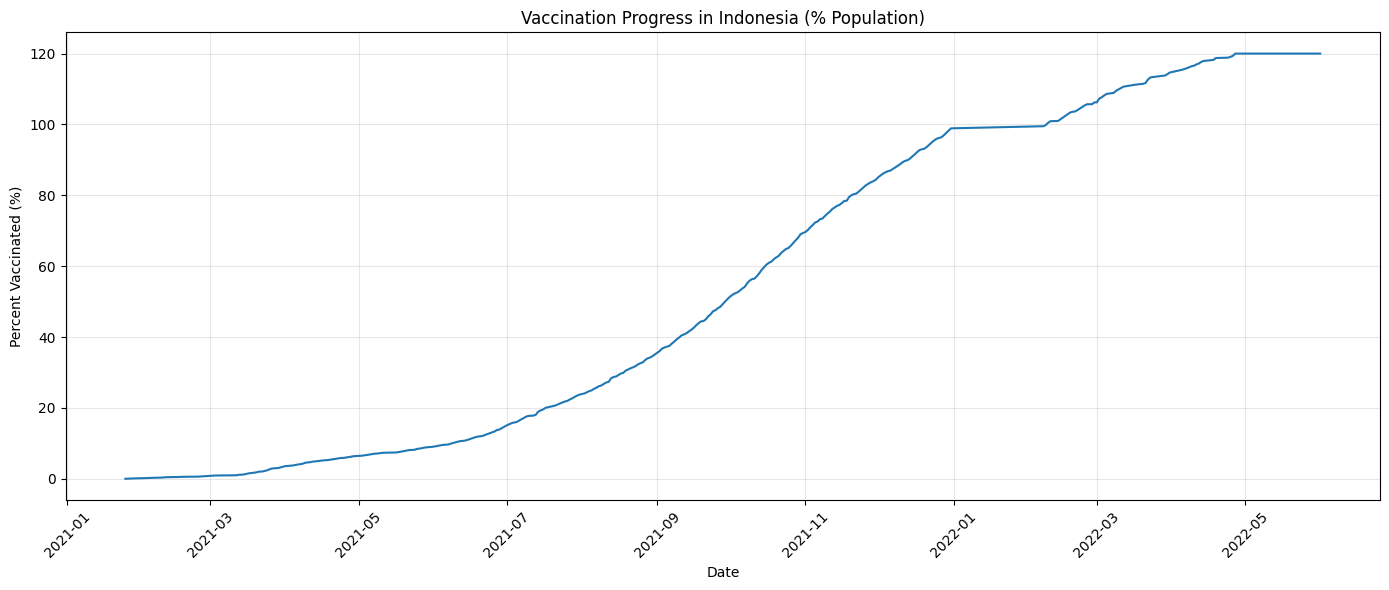

In [15]:
# Filter untuk Indonesia saja
vacc_indonesia = vaccination_progress[vaccination_progress['location'] == 'Indonesia'].copy()
vacc_indonesia['percent_vaccinated'] = (vacc_indonesia['rolling_people_vaccinated'] / vacc_indonesia['population']) * 100

print("\nVaccination Progress Indonesia:")
print(vacc_indonesia.tail(10))

# Visualisasi
plt.figure(figsize=(14, 6))
plt.plot(pd.to_datetime(vacc_indonesia['date']), vacc_indonesia['percent_vaccinated'])
plt.title('Vaccination Progress in Indonesia (% Population)')
plt.xlabel('Date')
plt.ylabel('Percent Vaccinated (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Buat summary report untuk portfolio
summary_report = {
    'Analysis': [
        'Global Total Cases',
        'Global Total Deaths',
        'Global Death Rate (%)',
        'Indonesia Total Cases',
        'Indonesia Total Deaths',
        'Indonesia Death Rate (%)',
        'Indonesia Infection Rate (%)',
        'Top Country by Infection Rate',
        'Top Country by Death Count'
    ],
    'Value': [
        f"{global_stats['total_cases'].values[0]:,.0f}",
        f"{global_stats['total_deaths'].values[0]:,.0f}",
        f"{global_stats['death_percentage'].values[0]:.2f}%",
        f"{death_rate_id['total_cases'].iloc[-1]:,.0f}",
        f"{death_rate_id['total_deaths'].iloc[-1]:,.0f}",
        f"{death_rate_id['death_percentage'].iloc[-1]:.2f}%",
        f"{infection_rate_id['infection_rate'].iloc[-1]:.2f}%",
        highest_infection['location'].iloc[0],
        highest_deaths['location'].iloc[0]
    ]
}

summary_df = pd.DataFrame(summary_report)
print("\n" + "="*60)
print("COVID-19 ANALYSIS SUMMARY REPORT")
print("="*60)
print(summary_df.to_string(index=False))



COVID-19 ANALYSIS SUMMARY REPORT
                     Analysis         Value
           Global Total Cases   774,766,789
          Global Total Deaths     6,965,213
        Global Death Rate (%)         0.90%
        Indonesia Total Cases     6,828,326
       Indonesia Total Deaths       162,050
     Indonesia Death Rate (%)         2.37%
 Indonesia Infection Rate (%)         2.48%
Top Country by Infection Rate        Brunei
   Top Country by Death Count United States
